# Housing price prediction using ML - Multiple Linear Regression method

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model 

In [2]:
df = pd.read_csv("homeprices_mlr.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


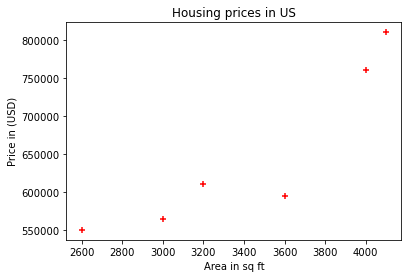

In [3]:
# plot scatter plot to understand relation between dependent (Area/Bedroom/Age) and independent variable(Price)
plt.xlabel("Area in sq ft")
plt.ylabel("Price in (USD)")
plt.title("Housing prices in US")
plt.scatter(df.area, df.price, color = 'red', marker = '+')

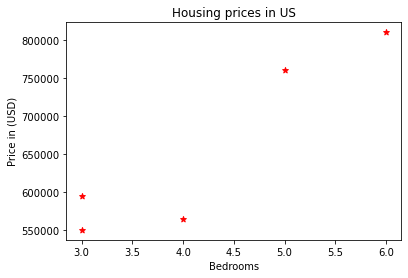

In [4]:
# plot scatter plot to understand relation between dependent (Area/Bedroom/Age) and independent variable(Price)
plt.xlabel("Bedrooms")
plt.ylabel("Price in (USD)")
plt.title("Housing prices in US")
# plt.scatter(df.area, df.price, color = 'red', marker = '+')
plt.scatter(df.bedrooms, df.price, color = 'red', marker = '*')
# plt.scatter(df.age, df.price, color = 'black', marker = '+')

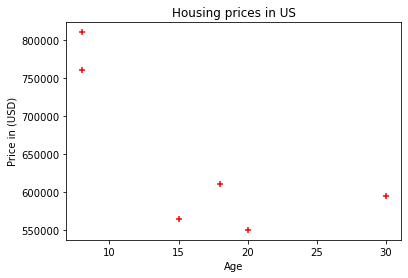

In [5]:
# plot scatter plot to understand relation between dependent (Area/Bedroom/Age) and independent variable(Price)
plt.xlabel("Age")
plt.ylabel("Price in (USD)")
plt.title("Housing prices in US")
# plt.scatter(df.area, df.price, color = 'red', marker = '+')
# plt.scatter(df.bedrooms, df.price, color = 'green', marker = '*')
plt.scatter(df.age, df.price, color = 'red', marker = '+')

In [6]:
# It can be seen from above scatter plots that 
# relation between independent variable - area and dependent variable - price - positive linear - clearly 
# relation between independent variable - bedrooms and dependent variable - price - positive linear clearly 
# relation between independent variable - age and dependent variable - price - negative linear fairly 

In [7]:
df.head()
# it can be seen from data that bedroom column has some missing values , decided to fill , using median of the column - 

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
import math
bedroom_median = math.floor(df.bedrooms.median())
bedroom_median

4

In [9]:
# fill median data within fill rows of the bedrooms
df.bedrooms = df.bedrooms.fillna(bedroom_median)
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [11]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [12]:
reg.intercept_

221323.0018654043

In [13]:
112.06244194*3000+23388.88007794*3-3231.71790863*40+221323.0018654043

498408.2515740243

In [14]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])

# Excercise  - Hiring

In [15]:
df_hiring = pd.read_csv('hiring.csv')
df_hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [16]:
# change column name of test_score and interview_score- use _ for out of 10)
df_hiring = df_hiring.rename(columns = {'test_score(out of 10)': 'test_score_outof_10', 'interview_score(out of 10)': 'interview_score_outof_10'})
df_hiring

,experience,test_score_outof_10,interview_score_outof_10,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
# There are blank fields in the test scope and excepience , fill experience with zeros and test score with median
import math
test_score_outof_10 = math.floor(df_hiring.test_score_outof_10.median())
test_score_outof_10

8

In [18]:
# fill rows with median value 
df_hiring.test_score_outof_10 = df_hiring.test_score_outof_10.fillna(test_score_outof_10)
df_hiring

,experience,test_score_outof_10,interview_score_outof_10,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [19]:
# fill median data within fill rows of the bedrooms
df_hiring.experience = df_hiring.experience.fillna("zero")
df_hiring

,experience,test_score_outof_10,interview_score_outof_10,salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [20]:
# experience column contain values in word, convert using word2number function
!pip install word2number
from word2number import w2n
df_hiring.experience = df_hiring.experience.apply(w2n.word_to_num)
df_hiring

,experience,test_score_outof_10,interview_score_outof_10,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [21]:
# change column name of salary($) to salary_in_USD)
df_hiring = df_hiring.rename(columns = {'salary($)': 'salary_in_USD'})
df_hiring

,experience,test_score_outof_10,interview_score_outof_10,salary_in_USD
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [22]:
# It looks like linear regression model fits that data
reg = linear_model.LinearRegression()
reg.fit(df_hiring[['experience', 'test_score_outof_10', 'interview_score_outof_10']], df_hiring.salary_in_USD)

LinearRegression()

In [23]:
reg.predict([[2, 9,6]])

array([53205.96797671])

In [24]:
reg.predict([[12, 10, 10]])

array([92002.18340611])